In [1]:
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt

X, y = cp.load(open('winequality-white.pickle', 'rb'))

In [2]:
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

Handin 1


<BarContainer object of 7 artists>

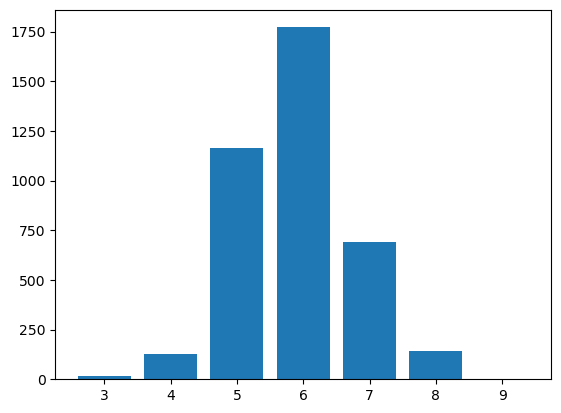

In [3]:
v = []
for i in range (3, 10):
    v.append(y_train[y_train == i].size)
print("Handin 1")
plt.bar(range(3, 10), v)

In [4]:
prediction = np.mean(y_train)
error_train = np.mean((y_train - prediction) ** 2)
error_test = np.mean((y_test - prediction) ** 2)
print("Handin 2")
print(f"Baseline error for training data: {error_train}")
print(f"Baseline error for test data: {error_test}")

Handin 2
Baseline error for training data: 0.7767772386501117
Baseline error for test data: 0.8138573000045535


In [5]:
means = np.mean(X_train, axis=0)
sds = np.std(X_train, axis=0)
X_train_n = (X_train - means) / sds
X_test_n = (X_test - means) / sds
X_train_n = np.hstack((X_train_n, np.full((N_train, 1), 1)))
X_test_n = np.hstack((X_test_n, np.full((N_test, 1), 1)))
w = np.linalg.inv(X_train_n.transpose().dot(X_train_n)).dot(X_train_n.transpose()).dot(y_train)
y_hat_train = X_train_n.dot(w)
y_hat_test = X_test_n.dot(w)
error_train = np.mean((y_train - y_hat_train) ** 2)
error_test = np.mean((y_test - y_hat_test) ** 2)
print("Handin 3")
print(f"Baseline error for training data: {error_train}")
print(f"Baseline error for test data: {error_test}")

Handin 3
Baseline error for training data: 0.5639996173941924
Baseline error for test data: 0.5607292042283468


Handin 4
The final model is not underfitting because both errors are reasonably small.
Approximately 100 data points are needed to get the optimal test error.


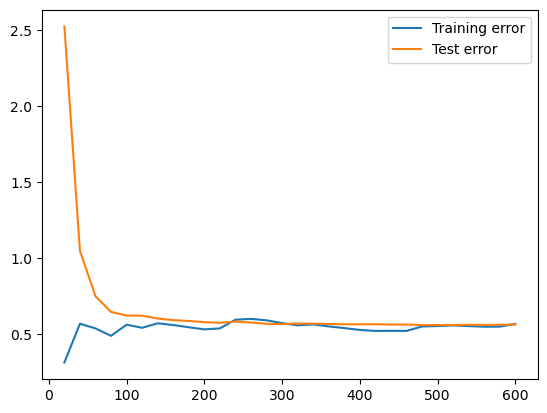

In [6]:
def learning_error(N_used):
    X_train_used = X_train_n[:N_used]
    y_train_used = y_train[:N_used]
    w = np.linalg.inv(X_train_used.transpose().dot(X_train_used)).dot(X_train_used.transpose()).dot(y_train_used)
    y_hat_used = X_train_used.dot(w)
    y_hat_test = X_test_n.dot(w)
    error_train = np.mean((y_train_used - y_hat_used) ** 2)
    error_test = np.mean((y_test - y_hat_test) ** 2)
    return (error_train, error_test)

n = []
e_train = []
e_test = []
for i in range(20, 620, 20):
    n.append(i)
    t1, t2 = learning_error(i)
    e_train.append(t1)
    e_test.append(t2)

plt.plot(n, e_train, label="Training error")
plt.plot(n, e_test, label="Test error")
plt.legend()

print("Handin 4")
print("The final model is not underfitting because both errors are reasonably small.\nApproximately 100 data points are needed to get the optimal test error.")

In [7]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train = X[:int(0.8 * N_train)]
y_train = y[:int(0.8 * N_train)]
X_validate = X[int(0.8 * N_train):N_train]
y_validate = y[int(0.8 * N_train):N_train]

lambdas = [1e-2, 1e-1, 1, 10, 100]
validation_ridge = {}
validation_lasso = {}
for l in lambdas:
    ridge_model = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(l))
    ridge_model.fit(X_train, y_train)
    lasso_model = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(l))
    lasso_model.fit(X_train, y_train)
    validation_ridge[l] = np.mean((ridge_model.predict(X_validate) - y_validate) ** 2)
    validation_lasso[l] = np.mean((lasso_model.predict(X_validate) - y_validate) ** 2)
print("Optional")
print(f"The best lambda for Ridge Regression is {min(validation_ridge, key=validation_ridge.get)}")
print(f"The best lambda for Lasso Regression is {min(validation_lasso, key=validation_lasso.get)}")

Optional
The best lambda for Ridge Regression is 0.01
The best lambda for Lasso Regression is 0.01


In [8]:
X_train = X[:N_train]
y_train = y[:N_train]

ridge_model = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(0.01))
lasso_model = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(0.01))
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

error_train_ridge = np.mean((ridge_model.predict(X_train) - y_train) ** 2)
error_train_lasso = np.mean((lasso_model.predict(X_train) - y_train) ** 2)
error_test_ridge = np.mean((ridge_model.predict(X_test) - y_test) ** 2)
error_test_lasso = np.mean((lasso_model.predict(X_test) - y_test) ** 2)

print("Optional")
print(f"Ridge Model:\n\tThe training error is {error_train_ridge}\n\tThe test error is {error_test_ridge}")
print(f"Lasso Model:\n\tThe training error is {error_train_lasso}\n\tThe test error is {error_test_lasso}")

Optional
Ridge Model:
	The training error is 0.5014354471429588
	The test error is 0.5161138844985443
Lasso Model:
	The training error is 0.5489433346501358
	The test error is 0.5422314371430671


/usr/local/Anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.575e-01, tolerance: 3.043e-01
  model = cd_fast.enet_coordinate_descent(


In [9]:
from sklearn.model_selection import GridSearchCV

powers = [2, 3, 4, 5, 6]
params_ridge = {"polynomialfeatures__degree": powers, "ridge__alpha": lambdas}
params_lasso = {"polynomialfeatures__degree": powers, "lasso__alpha": lambdas}

ridge_model = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge())
lasso_model = make_pipeline(PolynomialFeatures(), StandardScaler(), Lasso())

cv_ridge = GridSearchCV(ridge_model, params_ridge, scoring="neg_mean_squared_error")
cv_ridge.fit(X_train, y_train)
cv_lasso = GridSearchCV(lasso_model, params_lasso, scoring="neg_mean_squared_error")
cv_lasso.fit(X_train, y_train)

print("Super optional")
print(f"Ridge Model\n\t{cv_ridge.best_params_}")
print(f"Lasso Model\n\t{cv_lasso.best_params_}")

/usr/local/Anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.264e-01, tolerance: 2.429e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/Anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.195e-01, tolerance: 2.422e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/Anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Super optional
Ridge Model
	{'polynomialfeatures__degree': 3, 'ridge__alpha': 100}
Lasso Model
	{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 2}


/usr/local/Anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.575e-01, tolerance: 3.043e-01
  model = cd_fast.enet_coordinate_descent(
